# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt # for the datestamp on the output
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding coordinates(lat and longs) and cities
coordinates = []
cities = []
country = []
latitud = []
longitude = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
coordinates = zip(lats, longs)

# Identify nearest city for each lat, lng combination
for coord in coordinates:
    #lats,longs= coord
    city = citipy.nearest_city(coord[0], coord[1])
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city.city_name)
        country.append(city.country_code)
        latitud.append(coord[0])
        longitude.append(coord[1])

# Print the city count to confirm sufficient count
print("Cities", len(cities))
print("Country", len(country))
print("Lats", len(latitud))
print("Longs", len(longitude))

Cities 1500
Country 1500
Lats 1500
Longs 1500


In [19]:
# Creting the DataFrame with the nearest cities from the random coordinates 
city_dict={
    "Latitud":latitud,"Longitude":longitude,"City":cities,"Country":country}

cities_df= pd.DataFrame.from_dict(city_dict,orient='index').transpose()
cities_df


,Latitud,Longitude,City,Country
0,-65.496694,61.714808,taolanaro,mg
1,-72.521679,-130.725942,rikitea,pf
2,-22.390821,-150.785331,moerai,pf
3,88.370025,-141.788931,tuktoyaktuk,ca
4,-12.180413,-170.488071,samusu,ws
...,...,...,...,...
1495,28.890978,11.13385,awbari,ly
1496,-19.812909,157.02648,hervey bay,au
1497,-48.505757,-21.404846,arraial do cabo,br
1498,-56.264406,16.761681,bredasdorp,za


In [20]:
cities_clean = cities_df.drop_duplicates("City",keep="first")
cities_clean

,Latitud,Longitude,City,Country
0,-65.496694,61.714808,taolanaro,mg
1,-72.521679,-130.725942,rikitea,pf
2,-22.390821,-150.785331,moerai,pf
3,88.370025,-141.788931,tuktoyaktuk,ca
4,-12.180413,-170.488071,samusu,ws
...,...,...,...,...
1487,-22.322661,148.683084,moranbah,au
1490,22.500291,7.402291,gat,ly
1493,34.870431,117.506274,zaozhuang,cn
1495,28.890978,11.13385,awbari,ly


In [21]:
# Reindex DataFrame
cities_clean= cities_clean.reset_index(drop=True)
len(cities_clean)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
#Weather information, saving config information

# New URL "api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}"

url_current = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Set lists to replace latitud and longitude for nearest city to actual coordinates of city
actual_lat = []
actual_long = []

# Setting new weather parameters to retrieve

maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
infoDate = []
city_success = []

# Variables used in the for loop for printings
# Printing the number of record 
num_record = 0
# Printing the number of set starting from 1 changing the number of sets
num_set = 1
# Printing the name of the current city
city_curr= []
country_success =[]

# Printing first message of retrieval of data
print('''Beginning Data Retrieval     
-----------------------------''')

# Looping through all the cities for weather information retrieving
for index,row in cities_clean.iterrows():
    curr_city= row["City"]
    curr_country= row["Country"]
      
# Build query URL
    query_url =f"{url_current}q={curr_city},{curr_country}&units=(units)&appid={weather_api_key}"
    response= requests.get(query_url).json()
    #print(response)
# Creating Exceptions to continue runnig the code
    num_record = num_record + 1
    try:
        actual_lat.append(response["coord"]["lat"])
        actual_long.append(response["coord"]["lon"])
        maxTemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        windSpeed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        infoDate.append(response["dt"])
        city_success.append(curr_city)
        country_success.append(curr_country)
        
        # Integrating the information retrieved
       
        
        print(f"Processing Record {num_record} of Set {num_set}| {curr_city}")
        
    except:
        #actual_lat.append(np.nan)
        #actual_long.append(np.nan)
        #maxTemp.append(np.nan)
        #humidity.append(np.nan)
        #windSpeed.append(np.nan)
        #cloudiness.append(np.nan)
        #infoDate.append(np.nan)
        print(f"City not found. Skipping...")
        
        if num_record == 35:
            num_set = num_set+1
            num_record = 0
            # Time between them
            time.sleep(6)
            
    #if index == 5:
     #   break
            
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')


Beginning Data Retrieval     
-----------------------------
City not found. Skipping...
Processing Record 2 of Set 1| rikitea
Processing Record 3 of Set 1| moerai
Processing Record 4 of Set 1| tuktoyaktuk
City not found. Skipping...
City not found. Skipping...
Processing Record 7 of Set 1| maceio
Processing Record 8 of Set 1| rio grande
Processing Record 9 of Set 1| port alfred
Processing Record 10 of Set 1| cidreira
Processing Record 11 of Set 1| sitka
Processing Record 12 of Set 1| dalian
Processing Record 13 of Set 1| haines junction
Processing Record 14 of Set 1| atuona
Processing Record 15 of Set 1| hobart
Processing Record 16 of Set 1| thompson
Processing Record 17 of Set 1| dryden
Processing Record 18 of Set 1| lakes entrance
Processing Record 19 of Set 1| raahe
Processing Record 20 of Set 1| punta arenas
City not found. Skipping...
Processing Record 22 of Set 1| yelizovo
Processing Record 23 of Set 1| sisimiut
Processing Record 24 of Set 1| albany
Processing Record 25 of Set 1|

Processing Record 139 of Set 3| simao
City not found. Skipping...
Processing Record 141 of Set 3| verkhnetulomskiy
Processing Record 142 of Set 3| kingaroy
Processing Record 143 of Set 3| martapura
Processing Record 144 of Set 3| williams lake
Processing Record 145 of Set 3| tubmanburg
Processing Record 146 of Set 3| lagoa
Processing Record 147 of Set 3| hambantota
Processing Record 148 of Set 3| bat yam
Processing Record 149 of Set 3| hasaki
Processing Record 150 of Set 3| tuatapere
Processing Record 151 of Set 3| urumqi
Processing Record 152 of Set 3| dawson creek
Processing Record 153 of Set 3| tiznit
Processing Record 154 of Set 3| broome
Processing Record 155 of Set 3| znamenskoye
Processing Record 156 of Set 3| bethel
City not found. Skipping...
Processing Record 158 of Set 3| namibe
Processing Record 159 of Set 3| honolulu
Processing Record 160 of Set 3| port lincoln
Processing Record 161 of Set 3| sabancuy
City not found. Skipping...
Processing Record 163 of Set 3| ballitoville

Processing Record 346 of Set 3| burnie
Processing Record 347 of Set 3| kaitangata
Processing Record 348 of Set 3| port blair
Processing Record 349 of Set 3| manzhouli
Processing Record 350 of Set 3| zaysan
Processing Record 351 of Set 3| maturin
City not found. Skipping...
Processing Record 353 of Set 3| diego de almagro
Processing Record 354 of Set 3| calvinia
Processing Record 355 of Set 3| nenjiang
Processing Record 356 of Set 3| bangolo
Processing Record 357 of Set 3| sao lourenco do sul
Processing Record 358 of Set 3| kirovskiy
Processing Record 359 of Set 3| hun
Processing Record 360 of Set 3| blairmore
Processing Record 361 of Set 3| huilong
City not found. Skipping...
Processing Record 363 of Set 3| nantucket
Processing Record 364 of Set 3| kaduqli
Processing Record 365 of Set 3| raudeberg
Processing Record 366 of Set 3| noumea
Processing Record 367 of Set 3| konevo
Processing Record 368 of Set 3| asosa
Processing Record 369 of Set 3| dharchula
Processing Record 370 of Set 3| c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
# Print the city count to confirm sufficient count
print("City", len(city_success))
print("Lat", len(actual_lat))
print("Lng", len(actual_long))
print("Max Temp", len(maxTemp))
print("Humidity", len(humidity))
print("Cloudiness", len(cloudiness))
print("Wind Speed", len(windSpeed))
print("Country", len(country_success))
print("Date", len(infoDate))


City 541
Lat 541
Lng 541
Max Temp 541
Humidity 541
Cloudiness 541
Wind Speed 541
Country 541
Date 541


In [45]:
cities_weather_df= pd.DataFrame({"City":city_success,"Lat":actual_lat,"Lng":actual_long,"Max Temp":maxTemp,
                                 "Humidity":humidity,"Cloudiness":cloudiness,"Wind Speed":windSpeed,
                                 "Country":country_success,"Date":infoDate})


In [47]:
cities_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,298.16,74,100,5.48,pf,1619571198
1,moerai,-22.4333,-151.3333,298.88,70,55,3.47,pf,1619571198
2,tuktoyaktuk,69.4541,-133.0374,265.15,67,20,4.12,ca,1619571199
3,maceio,-9.6658,-35.7353,298.15,94,75,4.63,br,1619571199
4,rio grande,-32.0350,-52.0986,282.04,94,17,4.42,br,1619571200
...,...,...,...,...,...,...,...,...,...
536,bilma,18.6853,12.9164,302.27,12,0,1.15,ne,1619571422
537,moranbah,-22.0016,148.0466,296.90,46,3,8.31,au,1619571423
538,zaozhuang,34.8647,117.5542,292.03,32,100,2.16,cn,1619571423
539,awbari,26.5921,12.7805,302.70,20,86,5.71,ly,1619571424


In [15]:
cities_weather_df = pd.Dataframe{}

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [60]:
stats = cities_weather_df.describe()
stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,17.576965,18.573422,288.790296,70.759704,53.622921,3.322033,1.619571e+09
std,35.310653,92.647627,10.752233,21.895745,40.115091,2.181810,8.159596e+01
min,-54.800000,-179.166700,263.350000,1.000000,0.000000,0.120000,1.619571e+09
25%,-13.733300,-63.598600,281.150000,61.000000,10.000000,1.610000,1.619571e+09
50%,20.448700,21.050000,290.370000,75.000000,62.000000,2.790000,1.619571e+09
75%,49.750200,103.939300,298.150000,88.000000,97.000000,4.630000,1.619571e+09
max,78.218600,179.316700,308.150000,100.000000,100.000000,11.320000,1.619571e+09


In [66]:
cities_weather_df.value_counts()

City              Lat       Lng        Max Temp  Humidity  Cloudiness  Wind Speed  Country  Date      
acapulco           16.8634  -99.8901   301.15    78        1           3.09        mx       1619571138    1
pitimbu           -7.4706   -34.8086   298.15    94        75          3.09        br       1619571330    1
preobrazheniye     42.9019   133.9064  279.86    97        100         1.72        ru       1619571346    1
praia da vitoria   38.7333  -27.0667   288.15    88        75          4.27        pt       1619571246    1
praia              14.9215  -23.5087   295.15    73        75          6.17        cv       1619571264    1
                                                                                                         ..
hervey bay        -25.2986   152.8535  294.82    76        5           2.68        au       1619571424    1
hermanus          -34.4187   19.2345   285.93    88        86          2.04        za       1619571220    1
henties bay       -22.1160   14.2

In [72]:
#  Get the indices of cities that have humidity over 100%.
hum = cities_weather_df.loc[(cities_weather_df["Humidity"] > 100),:]
print(hum)

                   City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
19               albany -35.0169  117.8917    289.15       100          26   
63                niimi  34.9833  133.4667    287.59       100          75   
70            esperance -33.8667  121.9000    289.15       100          40   
84               dayong  25.0209  118.2898    294.15       100          90   
85        san cristobal   7.7669  -72.2250    299.15       100          40   
133              torbay  47.6666  -52.7314    279.26       100          90   
162  havre-saint-pierre  50.2334  -63.5986    277.15       100          90   
168              salmas  38.1973   44.7653    283.15       100          90   
188          hambantota   6.1241   81.1185    298.15       100          20   
208              quibor   9.9287  -69.6201    293.15       100         100   
304               roura   4.7263  -52.3274    297.04       100           0   
487            saint-lo  49.1162   -1.0903    280.15       100  

Int64Index([], dtype='int64')

In [71]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_weather_df.drop_duplicates("City",keep="first")
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,298.16,74,100,5.48,pf,1619571198
1,moerai,-22.4333,-151.3333,298.88,70,55,3.47,pf,1619571198
2,tuktoyaktuk,69.4541,-133.0374,265.15,67,20,4.12,ca,1619571199
3,maceio,-9.6658,-35.7353,298.15,94,75,4.63,br,1619571199
4,rio grande,-32.0350,-52.0986,282.04,94,17,4.42,br,1619571200
...,...,...,...,...,...,...,...,...,...
536,bilma,18.6853,12.9164,302.27,12,0,1.15,ne,1619571422
537,moranbah,-22.0016,148.0466,296.90,46,3,8.31,au,1619571423
538,zaozhuang,34.8647,117.5542,292.03,32,100,2.16,cn,1619571423
539,awbari,26.5921,12.7805,302.70,20,86,5.71,ly,1619571424


In [73]:
clean_city_data.reset_index()


,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,rikitea,-23.1203,-134.9692,298.16,74,100,5.48,pf,1619571198
1,1,moerai,-22.4333,-151.3333,298.88,70,55,3.47,pf,1619571198
2,2,tuktoyaktuk,69.4541,-133.0374,265.15,67,20,4.12,ca,1619571199
3,3,maceio,-9.6658,-35.7353,298.15,94,75,4.63,br,1619571199
4,4,rio grande,-32.0350,-52.0986,282.04,94,17,4.42,br,1619571200
...,...,...,...,...,...,...,...,...,...,...
536,536,bilma,18.6853,12.9164,302.27,12,0,1.15,ne,1619571422
537,537,moranbah,-22.0016,148.0466,296.90,46,3,8.31,au,1619571423
538,538,zaozhuang,34.8647,117.5542,292.03,32,100,2.16,cn,1619571423
539,539,awbari,26.5921,12.7805,302.70,20,86,5.71,ly,1619571424


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

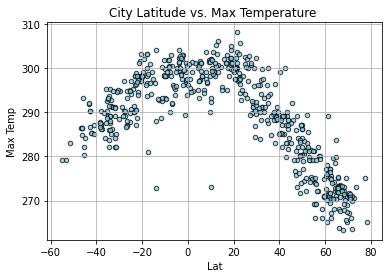

In [79]:
# Create a scatter plot which compares MPG to horsepower
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Max Temperature ")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.show()


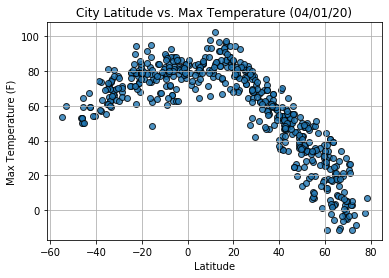

## Latitude vs. Humidity Plot

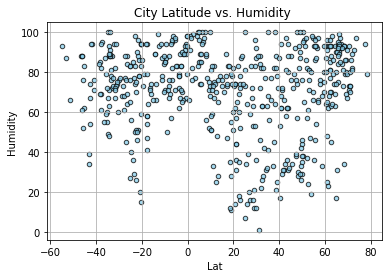

In [84]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Humidity ")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.show()

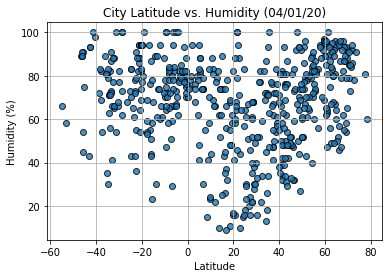

## Latitude vs. Cloudiness Plot

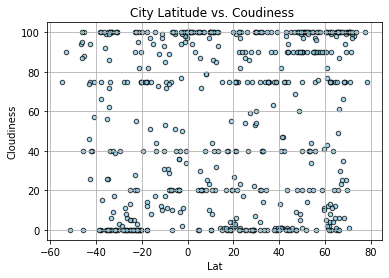

In [85]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Coudiness ")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.show()

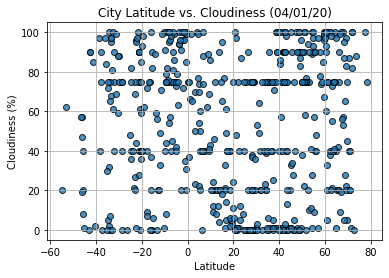

## Latitude vs. Wind Speed Plot

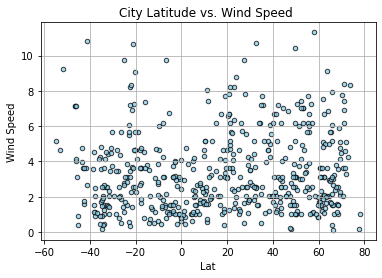

In [87]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Wind Speed ")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.show()

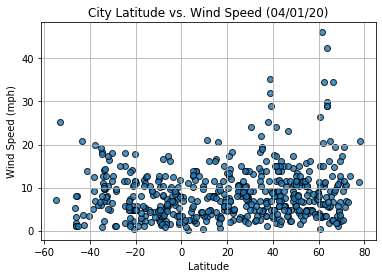

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


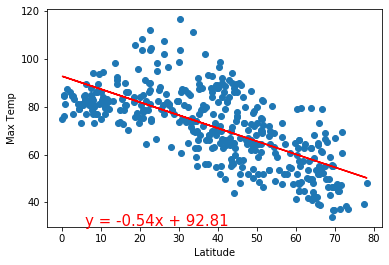

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


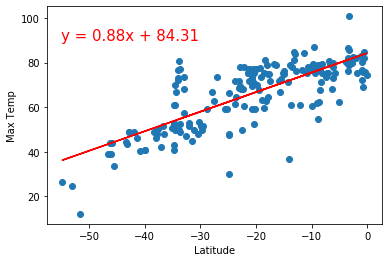

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


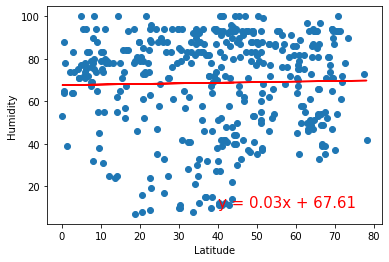

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


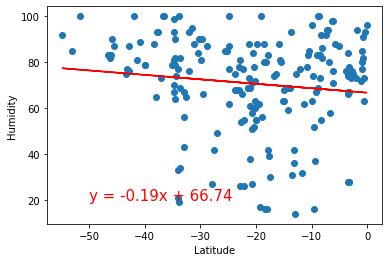

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


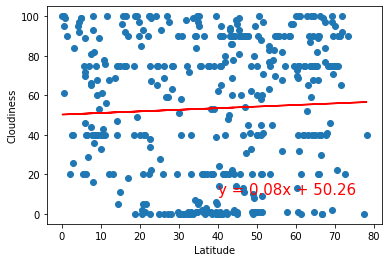

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


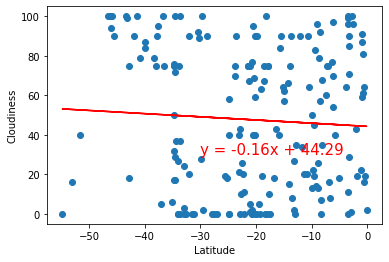

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


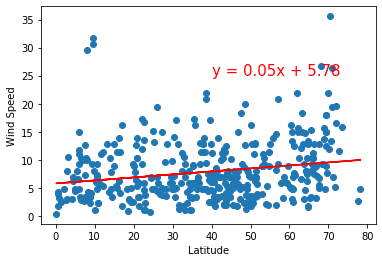

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


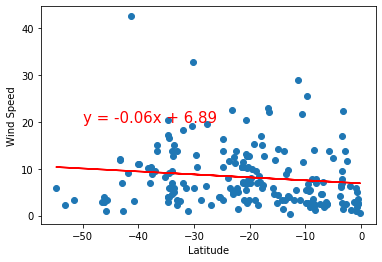